In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn as default style even
# if use only matplotlib
sns.set()

In [203]:
df = pd.read_csv("data.csv")

In [204]:
df.tail()

,Open time,Close time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
260,1664150400000,1664236799999,0.4916,0.5020,0.4576,0.4683,626520230.0,296847521.5,415486,312958187.0,148308701.4,0
261,1664236800000,1664323199999,0.4682,0.4882,0.4350,0.4457,628394011.0,292038620.6,410125,296354526.0,137912022.0,0
262,1664323200000,1664409599999,0.4458,0.4558,0.4168,0.4489,595920283.0,257517246.6,367581,278932240.0,120552174.8,0
263,1664409600000,1664495999999,0.4491,0.5109,0.4266,0.4877,788666701.0,365979762.8,516418,375407350.0,174557632.4,0
264,1664496000000,1664582399999,0.4876,0.4992,0.4667,0.4799,683028303.0,330105163.4,499348,344908814.0,166690857.3,0


In [205]:
df["Open"].mean(), df["Close"].mean()

(0.5467120754716982, 0.5453441509433962)

### Obersvation 1
Average open price and close price are 0.5467 and 0.5453 respectively even though the price varies day by day

In [206]:
df["difference"] = df["Close"] - df["Open"]


In [207]:
df.head()

,Open time,Close time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,difference
0,1640995200000,1641081599999,0.8298,0.8557,0.8297,0.8507,136976730.0,115507460.4,178238,70090109.0,5.911341e+07,0,0.0209
1,1641081600000,1641167999999,0.8508,0.8667,0.8372,0.8586,129688032.0,110265575.8,176940,65996017.0,5.611762e+07,0,0.0078
2,1641168000000,1641254399999,0.8586,0.8587,0.8213,0.8324,178618617.0,149876148.1,232484,89735857.0,7.529882e+07,0,-0.0262
3,1641254400000,1641340799999,0.8324,0.8456,0.7794,0.8228,214415744.0,177691937.0,270966,104076850.0,8.636767e+07,0,-0.0096
4,1641340800000,1641427199999,0.8227,0.8372,0.7092,0.7726,370612510.0,294783762.3,482373,173152247.0,1.379976e+08,0,-0.0501


In [208]:
no_of_profitable_days = len(df[df["difference"] > 0])
no_of_loss_days = len(df[df["difference"] < 0])

### Visualizing profitable days vs loss days for stock price

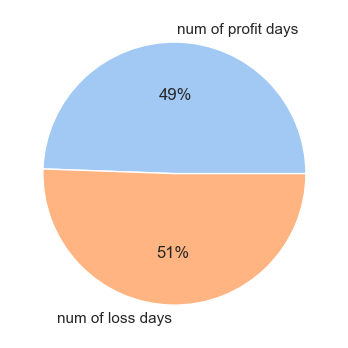

In [209]:
#define data
labels = ['num of profit days', 'num of loss days']
data = [no_of_profitable_days, no_of_loss_days]


#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Observation 2
As you see from the pie chart, the share of profit days and loss days is very identical. But, losses have a slight edge over profits

In [210]:
# filter profit days
profit_df = df[df["difference"] > 0]
profit_df["profit"] = profit_df["difference"]
profit_df = profit_df.drop(["Open time", "Close time", "Ignore", "difference"],  axis=1)

loss_df = df[df["difference"] < 0]
loss_df["loss"] = -loss_df["difference"]
loss_df = loss_df.drop(["Open time", "Close time", "Ignore", "difference"],  axis=1)

/var/folders/xs/dyj7t99n13vgh_k7kvcd6hrr0000gn/T/ipykernel_35110/2481538734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_df["profit"] = profit_df["difference"]
/var/folders/xs/dyj7t99n13vgh_k7kvcd6hrr0000gn/T/ipykernel_35110/2481538734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df["loss"] = -loss_df["difference"]


In [211]:
percentage_gain = (profit_df["profit"] / profit_df["Open"]) * 100
percentage_loss = -(loss_df["loss"] / loss_df["Open"]) * 100

In [212]:
profit_df["profit_percentage"] = percentage_gain
loss_df["loss_percentage"] = percentage_loss

<AxesSubplot: >

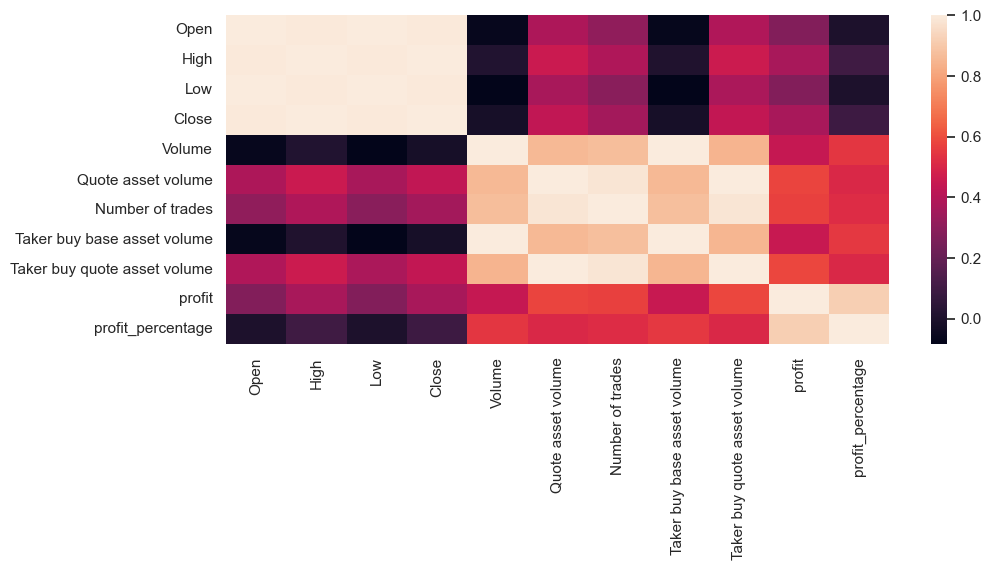

In [213]:
sns.heatmap(profit_df.corr())

The above heat map shows correlation between different columns in profit dataframe. From the heat map, we can draw few simple correlations between profit and other columns.

<AxesSubplot: >

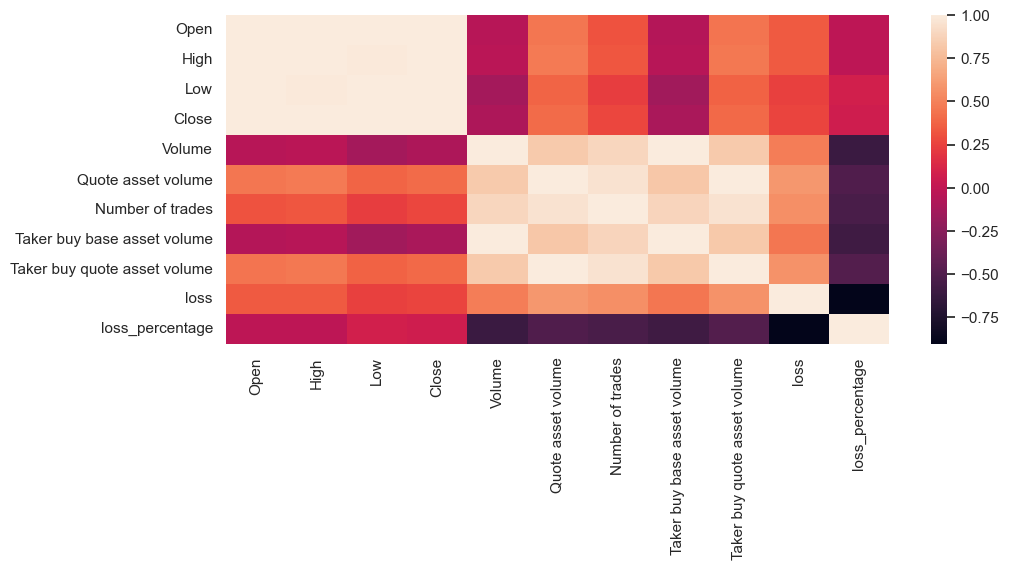

In [214]:
sns.heatmap(loss_df.corr())

In [215]:
# # Plot the responses for different events and regions
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=fmri)

df.head()

,Open time,Close time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,difference
0,1640995200000,1641081599999,0.8298,0.8557,0.8297,0.8507,136976730.0,115507460.4,178238,70090109.0,5.911341e+07,0,0.0209
1,1641081600000,1641167999999,0.8508,0.8667,0.8372,0.8586,129688032.0,110265575.8,176940,65996017.0,5.611762e+07,0,0.0078
2,1641168000000,1641254399999,0.8586,0.8587,0.8213,0.8324,178618617.0,149876148.1,232484,89735857.0,7.529882e+07,0,-0.0262
3,1641254400000,1641340799999,0.8324,0.8456,0.7794,0.8228,214415744.0,177691937.0,270966,104076850.0,8.636767e+07,0,-0.0096
4,1641340800000,1641427199999,0.8227,0.8372,0.7092,0.7726,370612510.0,294783762.3,482373,173152247.0,1.379976e+08,0,-0.0501


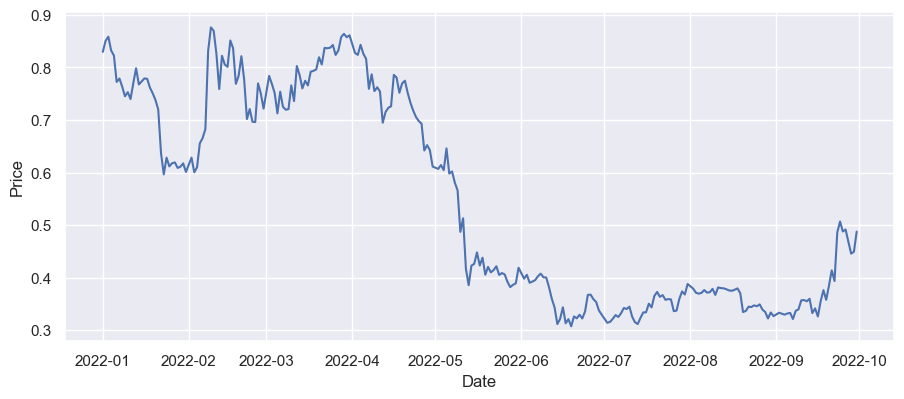

In [216]:
import datetime

df["Open time"] = pd.to_datetime(df['Open time'], unit='ms')
df["Close time"] = pd.to_datetime(df['Close time'], unit='ms')

sns.set(rc={'figure.figsize':(10.7,4.27)})
# Plot the responses for different events and regions
ax = sns.lineplot(x="Open time", y="Open",
             data=df)
ax.set(xlabel='Date', ylabel='Price')
plt.show()


<AxesSubplot: xlabel='Open time', ylabel='Taker buy quote asset volume'>

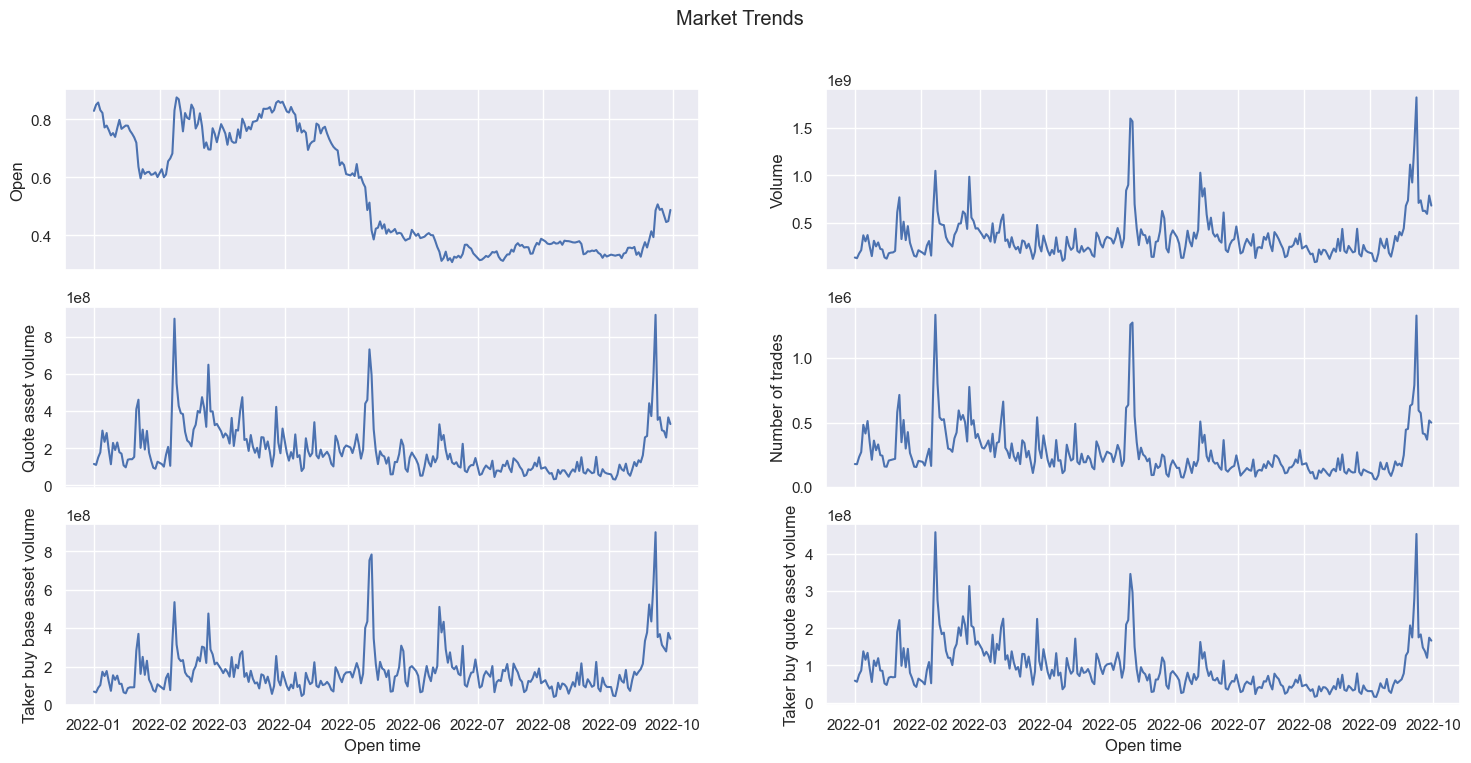

In [217]:

figure, axes = plt.subplots(3, 2, sharex=True, figsize=(18,8))
figure.suptitle('Market Trends')

sns.lineplot(data=df, x='Open time', y='Open', ax=axes[0,0])
sns.lineplot(data=df, x='Open time', y='Volume', ax=axes[0,1])
sns.lineplot(data=df, x='Open time', y='Quote asset volume', ax=axes[1,0])
sns.lineplot(data=df, x='Open time', y='Number of trades', ax=axes[1,1])
sns.lineplot(data=df, x='Open time', y='Taker buy base asset volume', ax=axes[2,0])
sns.lineplot(data=df, x='Open time', y='Taker buy quote asset volume', ax=axes[2,1])


### Observation 3

1. `Volume` of sales can be obtained by summing up `Taker buy base asset volume` and `Taker buy quote asset volume`.
2. `Volume` and `Taker buy base asset volume` looks very similar. It means the latter can influence the former.
3. `Quote asset volume` and `Taker buy quote asset volume` looks very similar but with different volume.
4. In the month of Janurary 2022, there's a price crash and recovery, that recovery is made by high number of trades. There is another crash in May 2022 (0.63 -> 0.38), and we see high number of trades. In September 2022, there is a recovery and that also recorded high number of trades. We cannot predict what happend after September. 

### Conclusion
Higher number of trades means likely price crash or rebound


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Volume')]

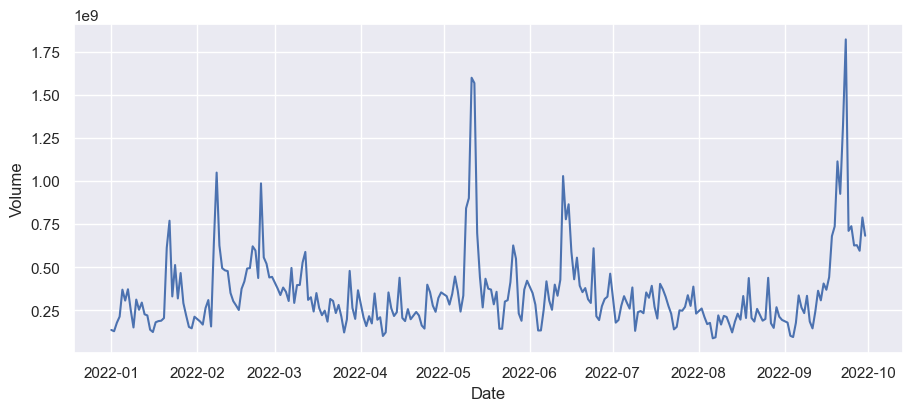

In [218]:
ax = sns.lineplot(x="Open time", y="Volume",
             data=df)

ax.set(xlabel='Date', ylabel='Volume')

In [219]:
df.dtypes

Open time                       datetime64[ns]
Close time                      datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Quote asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Ignore                                   int64
difference                             float64
dtype: object

In [229]:
df.index = pd.to_datetime(df['Open time'],format='%m/%d/%y %I:%M%p')
res = df.groupby(pd.Grouper(key='Open time', freq='M')).size()
print(res)

Open time
2022-01-31    31
2022-02-28    27
2022-03-31    30
2022-04-30    29
2022-05-31    30
2022-06-30    29
2022-07-31    30
2022-08-31    30
2022-09-30    29
Freq: M, dtype: int64


In [252]:
def shrink_date(val):
    return val.strftime('%d')

df['day'] = df['Open time'].apply(shrink_date)

<AxesSubplot: xlabel='day', ylabel='Volume'>

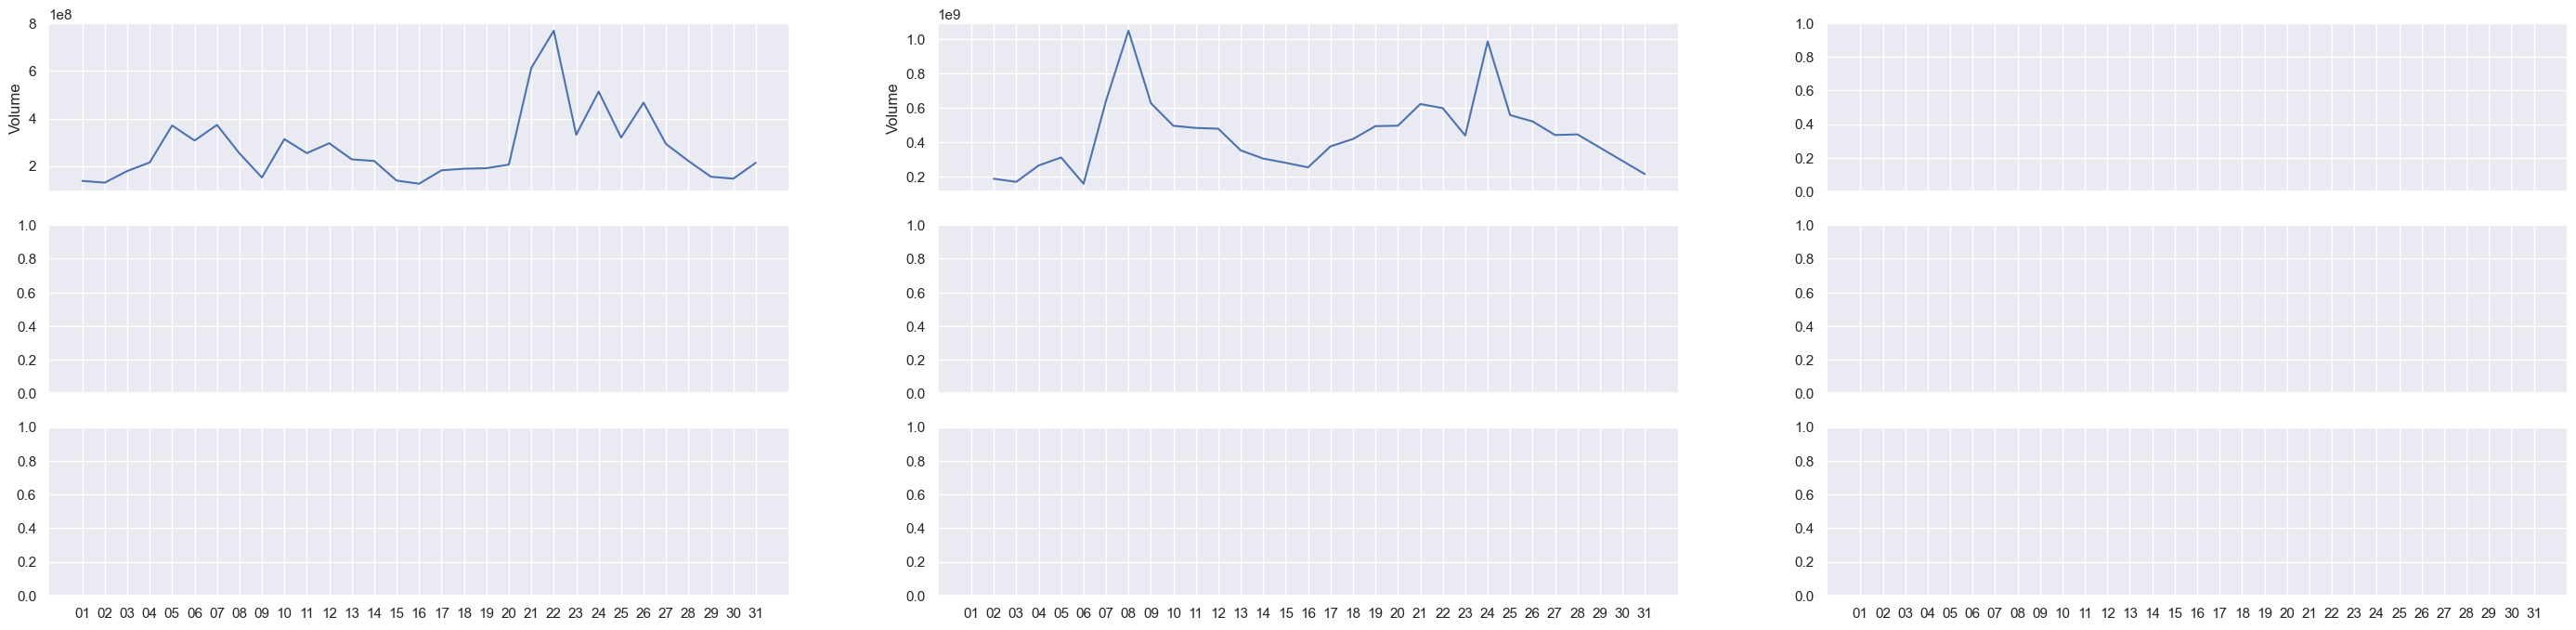

In [256]:
figure, axes = plt.subplots(3, 3, sharex=True, figsize=(35,8))
sns.lineplot(data=df[0:31], x='day',y = 'Volume', ax=axes[0,0])
sns.lineplot(data=df[30:58], x='day',y = 'Volume', ax=axes[0,1])